## 2101034/ Dany Syauqi Nazhif

## 2101049/Rizal Ramdhani

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [49]:
df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [50]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
df_4col = df[['Genre', 'Age',	'Annual Income (k$)', 'Spending Score (1-100)']]

In [53]:
df_4col.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [54]:
df_4col.isna().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [55]:
df_4col.columns = ['sex', 'age', 'income', 'spend_score']

In [56]:
df_4col.head()

,sex,age,income,spend_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [57]:
df_4col.isna().sum()

sex            0
age            0
income         0
spend_score    0
dtype: int64

In [58]:
df_4col["sex"] = df_4col["sex"].map({'Female':0, 'Male':1})


C:\Users\Dany Syauqi\AppData\Local\Temp\ipykernel_19320\113109267.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
# Check for missing values
if df_4col["sex"].isnull().any():
    print("Warning: There are missing values in the specified column.")
else:
    print(df_4col)

     sex  age  income  spend_score
0      1   19      15           39
1      1   21      15           81
2      0   20      16            6
3      0   23      16           77
4      0   31      17           40
..   ...  ...     ...          ...
195    0   35     120           79
196    0   45     126           28
197    1   32     126           74
198    1   32     137           18
199    1   30     137           83

[200 rows x 4 columns]


In [60]:
# Buat numpy array X dari dataframe data_mall_4kol
x = np.array(df_4col.values)
x

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

In [61]:
mask = df_4col["spend_score"] > 50
df_score = df_4col[mask]
df_score

,sex,age,income,spend_score
1,1,21,15,81
3,0,23,16,77
5,0,22,17,76
7,0,23,18,94
9,0,30,19,72
...,...,...,...,...
191,0,32,103,69
193,0,38,113,91
195,0,35,120,79
197,1,32,126,74


In [62]:
df_score.describe()

,sex,age,income,spend_score
count,97.000000,97.000000,97.000000,97.000000
mean,0.453608,34.597938,60.412371,71.670103
std,0.500429,13.024544,26.756133,14.710910
min,0.000000,18.000000,15.000000,51.000000
25%,0.000000,26.000000,42.000000,57.000000
50%,0.000000,31.000000,60.000000,73.000000
75%,1.000000,38.000000,78.000000,85.000000
max,1.000000,70.000000,137.000000,99.000000


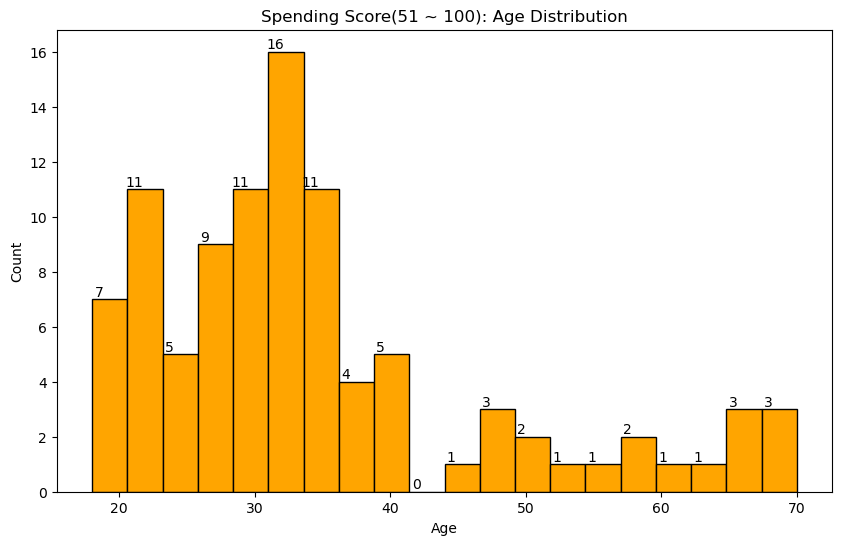

In [63]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_score['age'], color='orange', edgecolor='black', bins=20)  # Sesuaikan jumlah bins sesuai kebutuhan

# Menambahkan nilai histogram di atas grafik
for count, bin_edge in zip(n, bins):
    plt.text(bin_edge + 0.5, count, str(int(count)), ha='center', va='bottom', color='black')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Spending Score(51 ~ 100): Age Distribution')
plt.show()


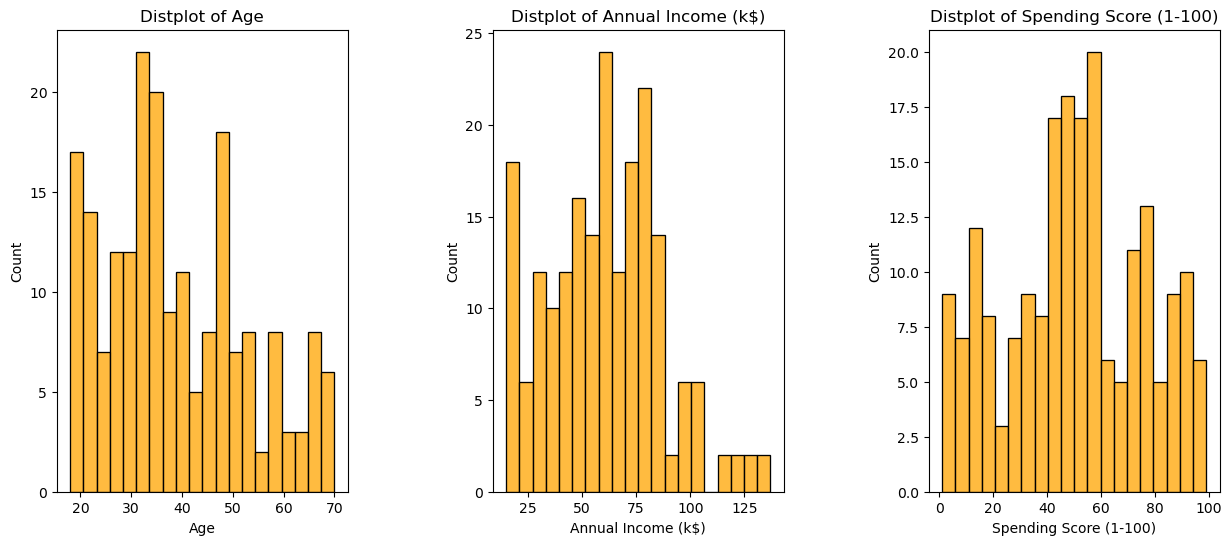

In [64]:
plt.figure(figsize=(15, 6))
n = 0

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    # Mengubah warna batang pada histogram
    sns.histplot(df[x], bins=20, color='orange')
    plt.title('Distplot of {}'.format(x))

plt.show()


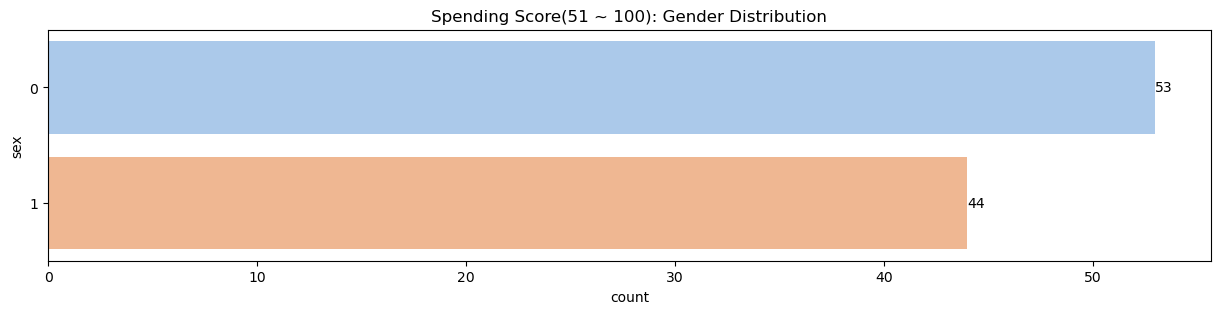

In [65]:
colors = sns.color_palette('pastel')

plt.figure(figsize = (15 , 3))
ax=sns.countplot(y = 'sex' , data = df_score, palette=colors)
plt.title('Spending Score(51 ~ 100): Gender Distribution')
# Menambahkan indeks angka di ujung batang plot
for i in ax.containers:
    ax.bar_label(i,)
plt.show();

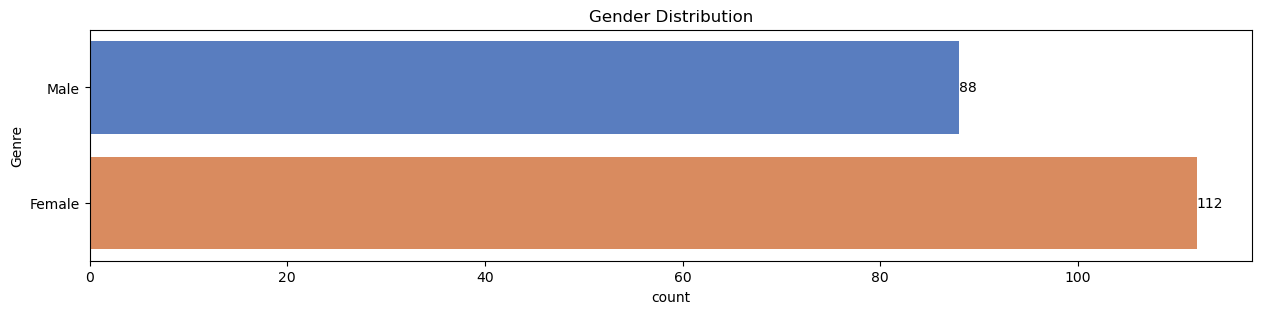

In [66]:
colors = sns.color_palette('muted')

plt.figure(figsize=(15, 3))
ax = sns.countplot(y='Genre', data=df, palette=colors)

plt.title('Gender Distribution')

# Menambahkan indeks angka di ujung batang plot
for i in ax.containers:
    ax.bar_label(i,)
plt.show()


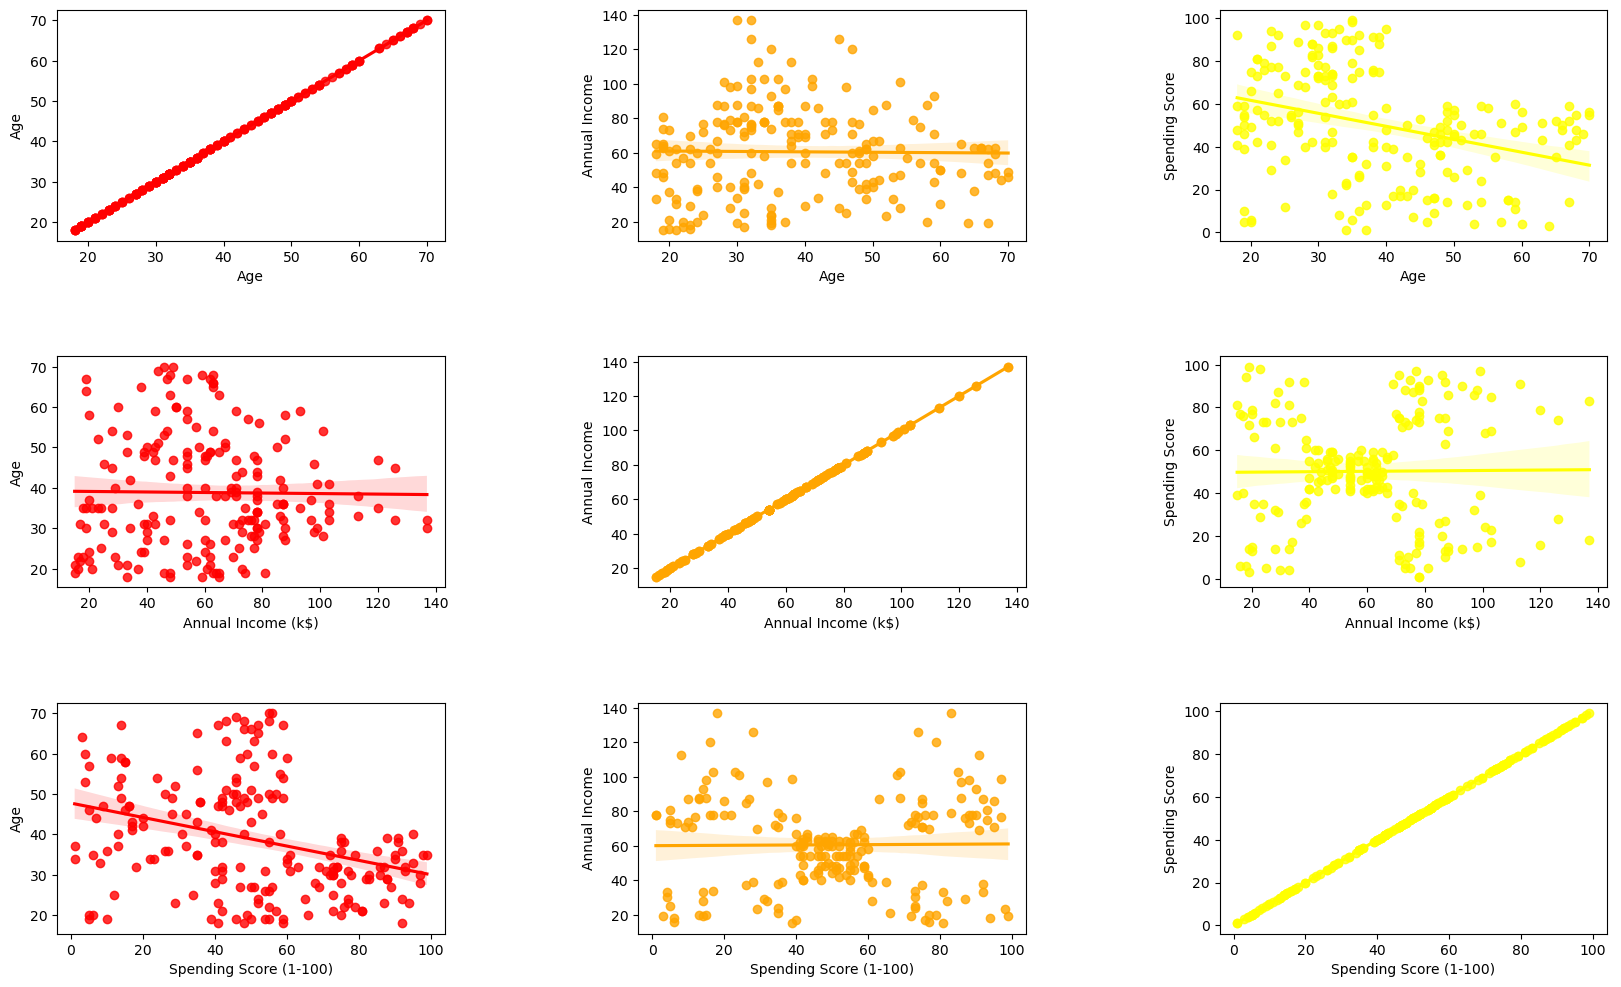

In [67]:
plt.figure(1, figsize=(20, 12))
n = 0

# Warna kustom yang akan Anda gunakan
custom_colors = ['red', 'orange', 'yellow']

for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.5, wspace=0.5)

        # Menentukan warna berdasarkan indeks n
        color_index = (n - 1) % len(custom_colors)
        current_color = custom_colors[color_index]

        # Menggunakan warna kustom dengan parameter color
        sns.regplot(x=x, y=y, data=df, color=current_color)

        plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)

plt.show()


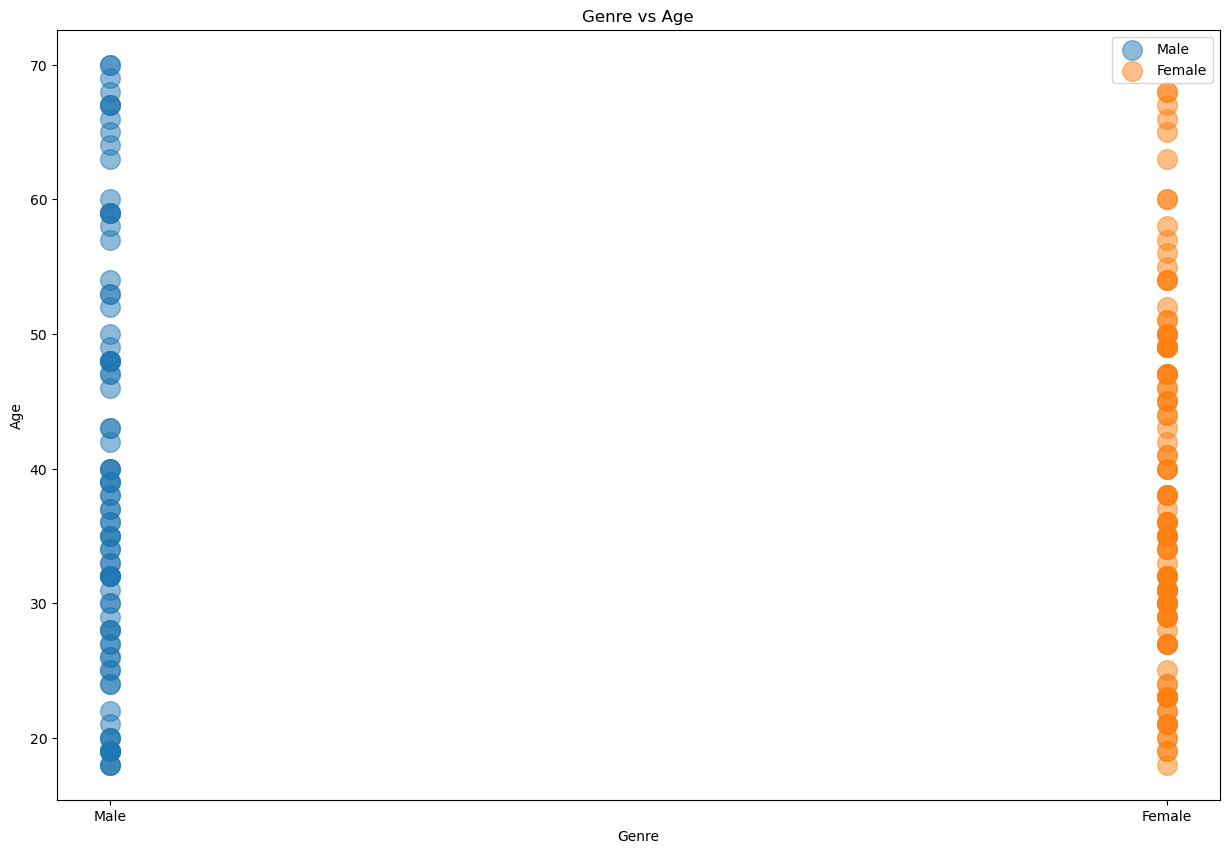

In [68]:
plt.figure(1 , figsize = (15 , 10))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Genre' , y = 'Age' , data = df[df['Genre'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Genre'), plt.ylabel('Age') 
plt.title('Genre vs Age')
plt.legend()
plt.show()

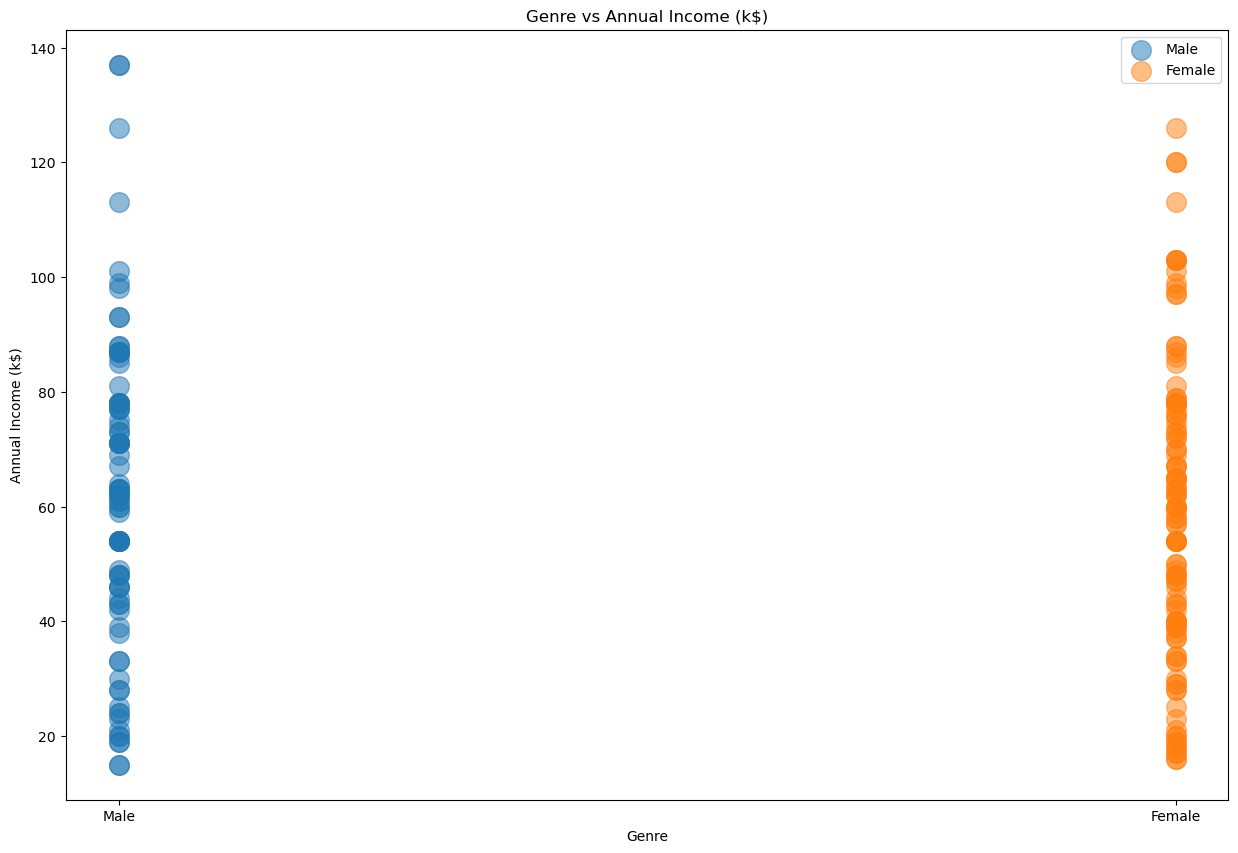

In [69]:
plt.figure(1 , figsize = (15 , 10))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Genre' , y = 'Annual Income (k$)' , data = df[df['Genre'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Genre'), plt.ylabel('Annual Income (k$)') 
plt.title('Genre vs Annual Income (k$)')
plt.legend()
plt.show()

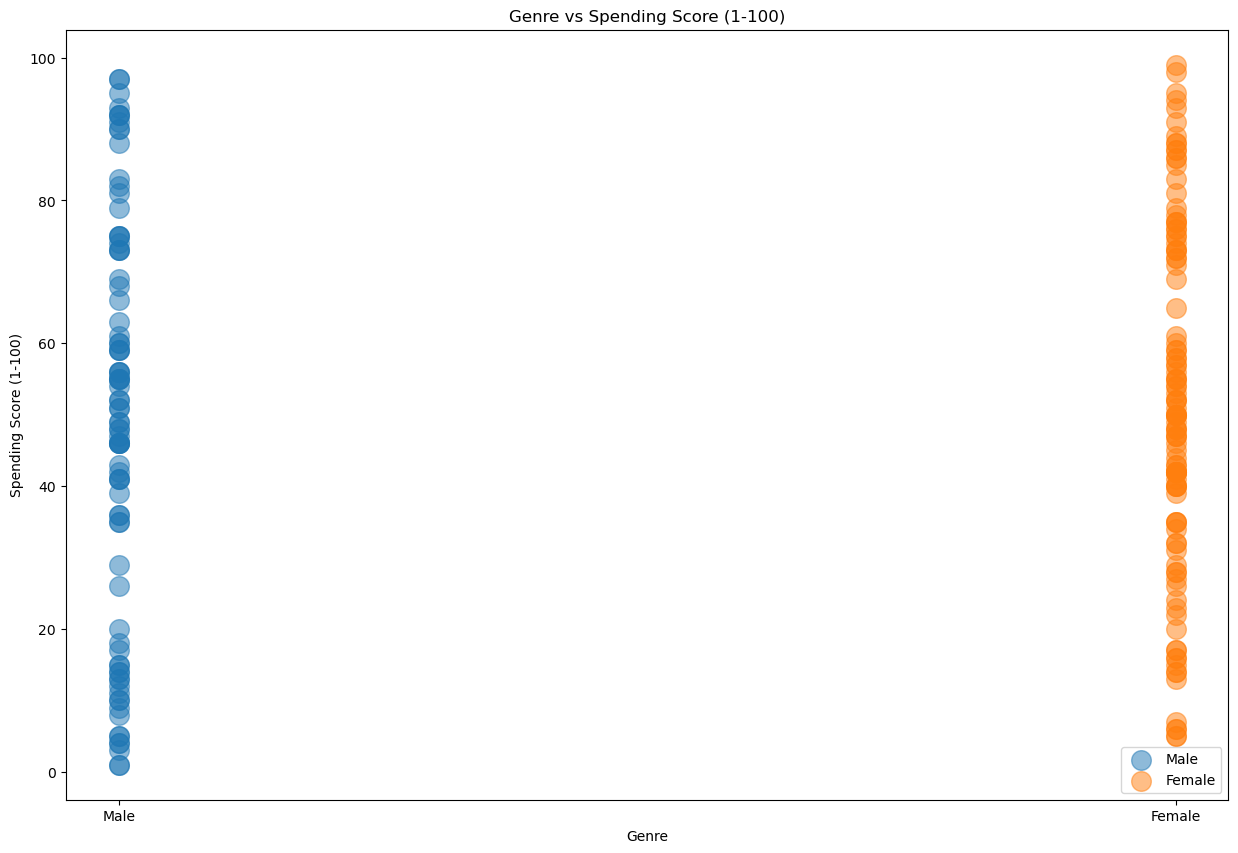

In [70]:
plt.figure(1 , figsize = (15 , 10))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Genre' , y = 'Spending Score (1-100)' , data = df[df['Genre'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Genre'), plt.ylabel('Spending Score (1-100)') 
plt.title('Genre vs Spending Score (1-100)')
plt.legend()
plt.show()

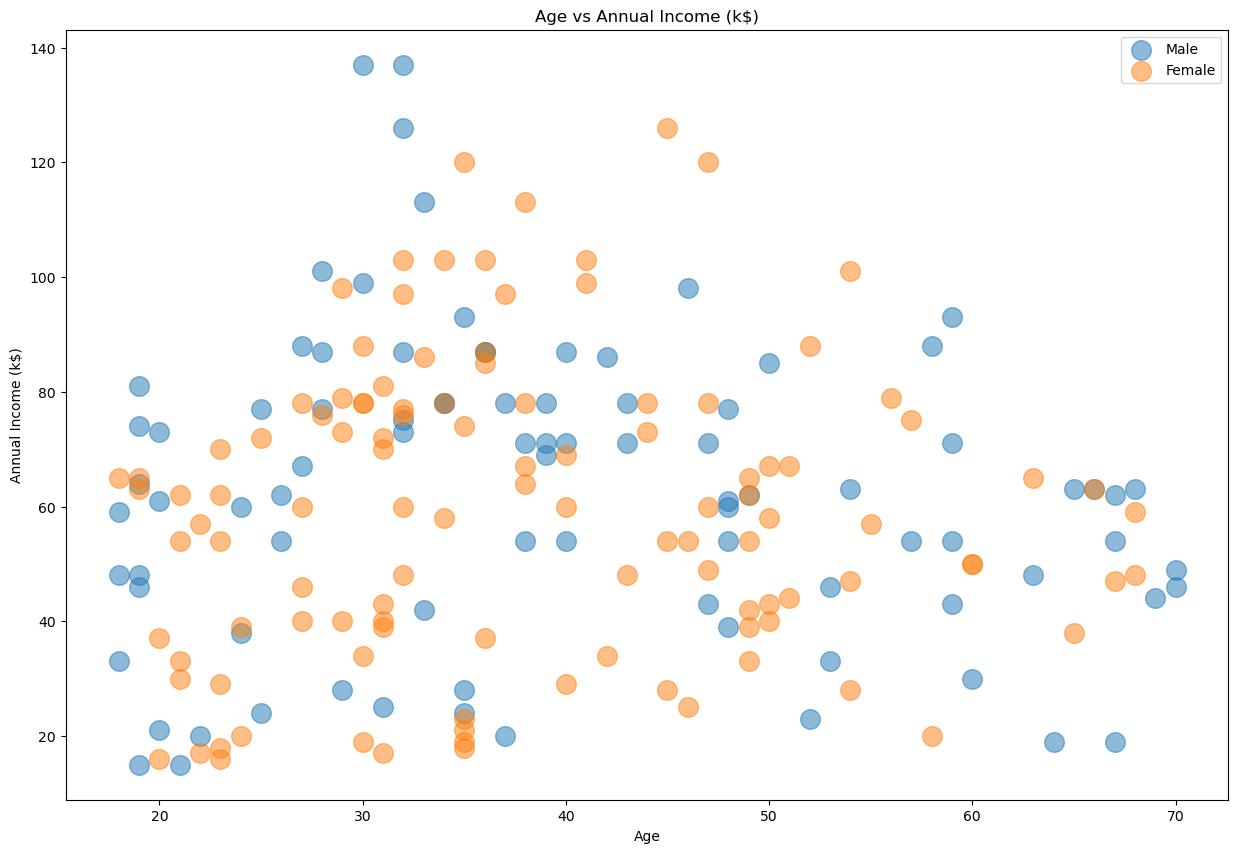

In [71]:
plt.figure(1 , figsize = (15 , 10))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Genre'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income (k$)')
plt.legend()
plt.show()

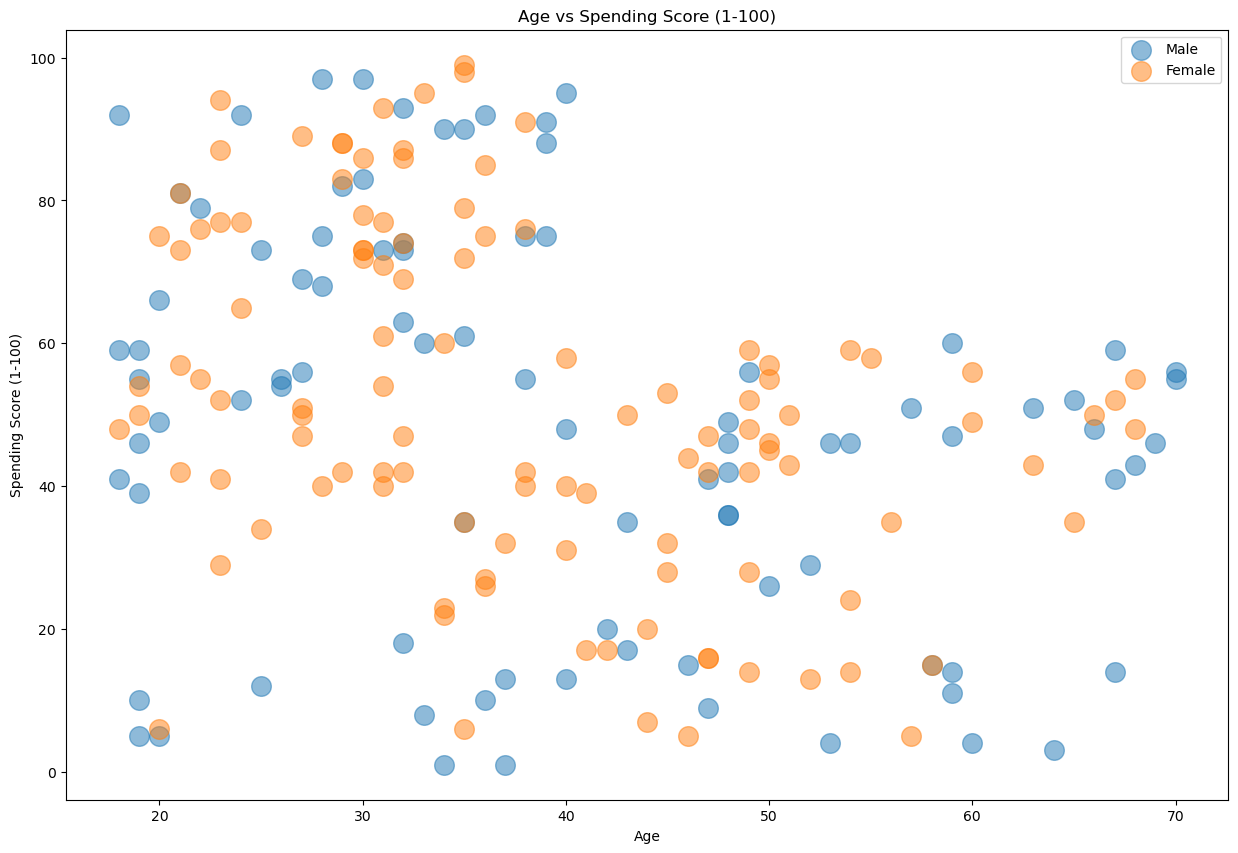

In [72]:
plt.figure(1 , figsize = (15 , 10))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Spending Score (1-100)' , data = df[df['Genre'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Spending Score (1-100)') 
plt.title('Age vs Spending Score (1-100)')
plt.legend()
plt.show()

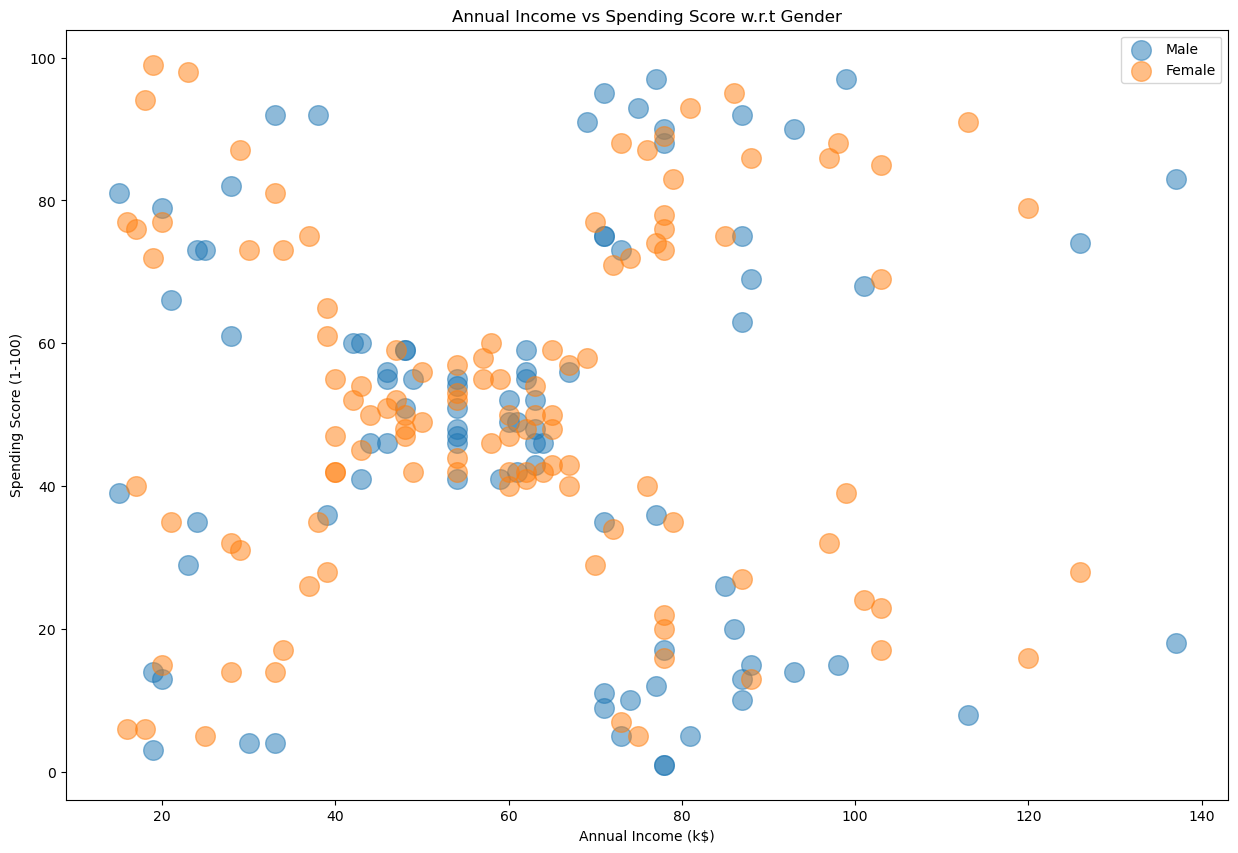

In [73]:
plt.figure(1 , figsize = (15 , 10))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,data = df[df['Genre'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

In [74]:
X = df.iloc[: , [3,4]]
print(f"X Shape {X.shape}")
X.head(10)

X Shape (200, 2)


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


In [75]:
n_clusters = range(2 , 11)
inertia_errors = []
silhouette_scores = []
# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters= k , random_state= 42)
    #TRAIN MODEL
    model.fit(X)
    #CALCULATE INERTIA
    inertia_errors.append(model.inertia_)
    #CALCULATE SILHOUETTE SCORE
    silhouette_scores.append(silhouette_score(X , model.labels_))
print("Inertia:", inertia_errors[:10])
print()
print("Silhouette Scores:", silhouette_scores[:10])

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NU

Inertia: [181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30241.343617936585, 25036.417604033984, 21916.794789843727, 20072.07093940401]

Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648, 0.53976103063432, 0.5288104473798049, 0.45481197931195283, 0.4561091950997367, 0.4410568674364981]


In [76]:
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(x= range(2 , 11) , y= inertia_errors , title="Elbow Method")
fig.update_layout(xaxis_title="Number of Clusters" , yaxis_title="Inertia")
fig.show()

In [77]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = px.line(x= n_clusters , y= silhouette_scores , title= "AVG Silhouette Coefficient")
fig.update_layout(xaxis_title= 'Number of Clusters' , yaxis_title= 'Silhouette Score')
fig.show();

In [78]:
final_model = KMeans(n_clusters=5 , random_state= 42)
final_model.fit(X)

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=5, random_state=42)

In [79]:
labels = final_model.labels_
centroids = final_model.cluster_centers_
print(labels[:5])

[4 2 4 2 4]


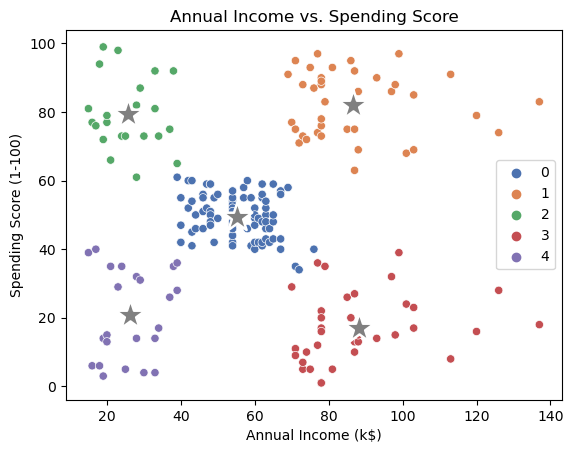

In [80]:
#plot "Annual Income" vs "Spending Score" with final_model labels
sns.scatterplot(x=df['Annual Income (k$)'] , y= df['Spending Score (1-100)'] ,
               hue=labels,
               palette='deep')
sns.scatterplot(
    x= centroids[:,0],
    y= centroids[: ,1],
    color= 'gray',
    marker= '*',
    s= 500
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score");

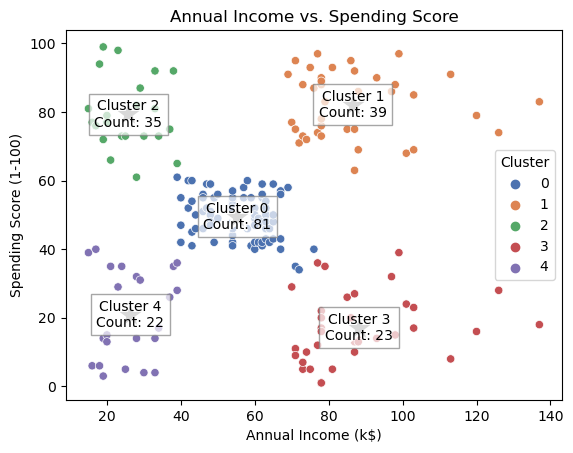

In [81]:
# Assuming 'labels' is the array containing cluster labels obtained from final_model
df['Cluster'] = labels

# Scatter plot
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue='Cluster', palette='deep', data=df)

# Centroids
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='gray', marker='*', s=500)

# Adding text annotations for cluster counts
for i, cluster_count in enumerate(df['Cluster'].value_counts()):
    plt.text(centroids[i, 0], centroids[i, 1], f'Cluster {i}\nCount: {cluster_count}',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score")
plt.legend(title='Cluster')

plt.show()


In [82]:
xgb = X.groupby(final_model.labels_).mean()

fig = px.bar(
    xgb,
    barmode='group',
    title="Annual income and spending score by Cluster",
    color_discrete_sequence=['orange','#FFDB58']*len(xgb)
)
fig.update_layout(xaxis_title="Clusters", yaxis_title='Value')

fig.show()


In [83]:
from sklearn.metrics import silhouette_score

# Assuming 'X' is your feature matrix used for clustering
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.553931997444648


In [84]:
final_model6 = KMeans(n_clusters=6 , random_state= 42)
final_model6.fit(X)

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Dany Syauqi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



KMeans(n_clusters=6, random_state=42)

In [85]:
labels = final_model6.labels_
centroids = final_model6.cluster_centers_
print(labels[:5])

[3 4 3 4 3]


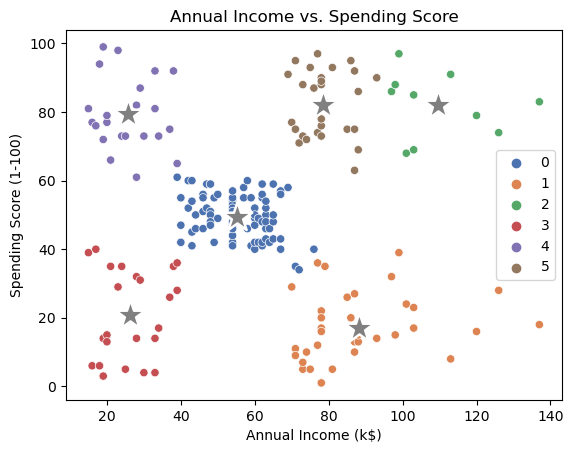

In [86]:
#plot "Annual Income" vs "Spending Score" with final_model labels
sns.scatterplot(x=df['Annual Income (k$)'] , y= df['Spending Score (1-100)'] ,
               hue=labels,
               palette='deep')
sns.scatterplot(
    x= centroids[:,0],
    y= centroids[: ,1],
    color= 'gray',
    marker= '*',
    s= 500
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score");

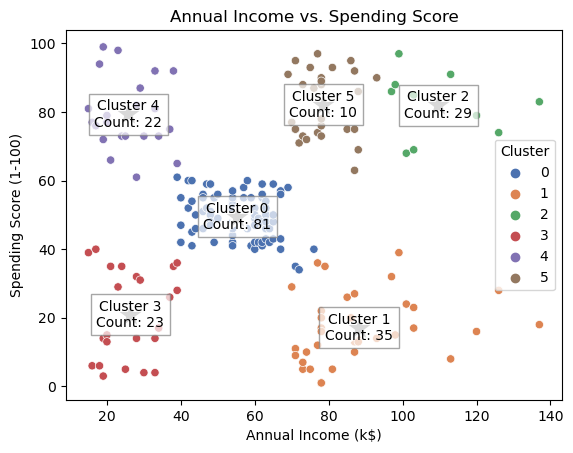

In [87]:
# Assuming 'labels' is the array containing cluster labels obtained from final_model
df['Cluster'] = labels

# Scatter plot
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue='Cluster', palette='deep', data=df)

# Centroids
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], color='gray', marker='*', s=500)

# Adding text annotations for cluster counts
for i, cluster_count in enumerate(df['Cluster'].value_counts()):
    plt.text(centroids[i, 0], centroids[i, 1], f'Cluster {i}\nCount: {cluster_count}',
             ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score")
plt.legend(title='Cluster')

plt.show()


In [88]:
xgb = X.groupby(final_model6.labels_).mean()

fig = px.bar(
    xgb,
    barmode='group',
    title="Annual income and spending score by Cluster",
    color_discrete_sequence=['orange','#FFDB58']*len(xgb)
)
fig.update_layout(xaxis_title="Clusters", yaxis_title='Value')

fig.show()


In [89]:
from sklearn.metrics import silhouette_score

# Assuming 'X' is your feature matrix used for clustering
silhouette_avg = silhouette_score(X, labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.53976103063432
